# Ejercicios 

1. Maximizar la función f(x) = x sen(10 π x) + 1, con x ∈ [0,1].

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform
import random
import pandas as pd
from PIL import Image


In [9]:

# Parámetros del AG
L = 8  # Longitud del cromosoma (bits)
K = 100  # Tamaño de la población
M = 100  # Número de generaciones
p_mut = 0.05  # Probabilidad de mutación

# Función objetivo
def f(x):
    return x * np.sin(10 * np.pi * x) + 1

# Decodificación binaria → real en [0, 1]
def decode(crom):
    decimal = sum([bit * 2**(L - 1 - i) for i, bit in enumerate(crom)])
    return decimal / (2**L - 1)

# Generar población inicial
def generar_poblacion():
    return [[randint(0, 1) for _ in range(L)] for _ in range(K)]

# Evaluar aptitud
def evaluar(poblacion):
    aptitudes = [f(decode(ind)) for ind in poblacion]
    total = sum(aptitudes)
    probabilidades = [a / total for a in aptitudes]
    return aptitudes, probabilidades

# Selección por ruleta
def seleccionar(poblacion, probabilidades):
    nueva_poblacion = []
    for _ in range(K):
        r = uniform(0, 1)
        suma = 0
        for i, p in enumerate(probabilidades):
            suma += p
            if r <= suma:
                nueva_poblacion.append(poblacion[i][:])
                break
    return nueva_poblacion

# Cruce en un punto
def cruzar(poblacion):
    hijos = []
    for i in range(0, K, 2):
        padre1 = poblacion[i]
        padre2 = poblacion[i + 1]
        punto = randint(1, L - 1)
        hijo1 = padre1[:punto] + padre2[punto:]
        hijo2 = padre2[:punto] + padre1[punto:]
        hijos.extend([hijo1, hijo2])
    return hijos

# Mutación
def mutar(poblacion):
    for ind in poblacion:
        for i in range(L):
            if uniform(0, 1) < p_mut:
                ind[i] = 1 - ind[i]
    return poblacion


Mejor x encontrado: 0.8509803921568627
f(x) máxima encontrada: 1.8505767889325506


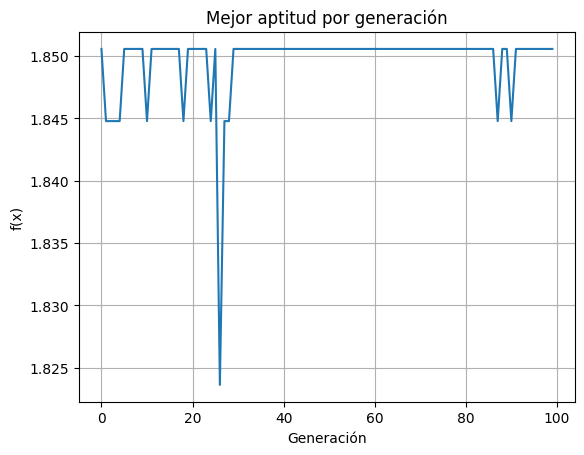

In [10]:

# Algoritmo Genético
poblacion = generar_poblacion()
mejores = []

for _ in range(M):
    aptitudes, probabilidades = evaluar(poblacion)
    mejores.append(max(aptitudes))
    seleccionados = seleccionar(poblacion, probabilidades)
    hijos = cruzar(seleccionados)
    poblacion = mutar(hijos)

# Resultados
aptitudes_finales, _ = evaluar(poblacion)
mejor_ind = poblacion[np.argmax(aptitudes_finales)]
mejor_x = decode(mejor_ind)
mejor_f = f(mejor_x)

# Mostrar resultados
print(f"Mejor x encontrado: {mejor_x}")
print(f"f(x) máxima encontrada: {mejor_f}")

# Gráfico de convergencia
plt.plot(mejores)
plt.title("Mejor aptitud por generación")
plt.xlabel("Generación")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()



2. Verdadera democracia. Suponga que usted es el jefe de gobierno y está interesado en que pasen
los proyectos de su programa político. Sin embargo, en el congreso conformado por 5 partidos, no
es fácil su tránsito, por lo que debe repartir el poder, conformado por ministerios y otras agencias
del gobierno, con base en la representación de cada partido. Cada entidad estatal tiene un peso de
poder, que es el que se debe distribuir. Suponga que hay 50 curules, distribuya aleatoriamente, con
una distribución no informe entre los 5 partidos esas curules. Defina una lista de 50 entidades y
asígneles aleatoriamente un peso político de 1 a 100 puntos. Cree una matriz de poder para repartir
ese poder, usando AGs.

In [13]:

# 5 partidos políticos
partidos = ['A', 'B', 'C', 'D', 'E']
curules_total = 50

# Distribución no uniforme de curules
curules = np.random.multinomial(curules_total, [0.4, 0.25, 0.2, 0.1, 0.05])
representacion = dict(zip(partidos, curules))
print("Representación por partido:", representacion)

entidades = [f"Entidad_{i+1}" for i in range(50)]
pesos_entidades = [random.randint(1, 100) for _ in range(50)]
print("Ejemplo de entidades con pesos:", list(zip(entidades[:5], pesos_entidades[:5])))

def crear_cromosoma(representacion):
    cromosoma = []
    for i, partido in enumerate(partidos):
        cromosoma += [partido] * representacion[partido]
    random.shuffle(cromosoma)
    return cromosoma

def fitness(cromosoma, pesos, representacion):
    poder_por_partido = {p: 0 for p in partidos}
    for idx, partido in enumerate(cromosoma):
        poder_por_partido[partido] += pesos[idx]

    poder_total = sum(pesos)
    ideal = {p: (representacion[p]/curules_total) * poder_total for p in partidos}
    
    error = sum(abs(poder_por_partido[p] - ideal[p]) for p in partidos)
    return -error  # Entre menor el error, mejor el fitness

def mutar(cromosoma):
    i, j = random.sample(range(len(cromosoma)), 2)
    cromosoma[i], cromosoma[j] = cromosoma[j], cromosoma[i]
    return cromosoma

def cruzar(padre, madre):
    punto = random.randint(1, len(padre) - 2)
    hijo = padre[:punto] + madre[punto:]
    return hijo

def algoritmo_genetico(pesos, representacion, generaciones=100, poblacion_size=50):
    poblacion = [crear_cromosoma(representacion) for _ in range(poblacion_size)]

    for _ in range(generaciones):
        poblacion.sort(key=lambda c: fitness(c, pesos, representacion), reverse=True)
        nueva_poblacion = poblacion[:10]  # elitismo

        while len(nueva_poblacion) < poblacion_size:
            padre, madre = random.sample(poblacion[:25], 2)
            hijo = cruzar(padre.copy(), madre.copy())
            if random.random() < 0.2:
                hijo = mutar(hijo)
            nueva_poblacion.append(hijo)
        poblacion = nueva_poblacion
    
    mejor = max(poblacion, key=lambda c: fitness(c, pesos, representacion))
    return mejor

# Crear una distribución y pesos
pesos = [random.randint(1, 100) for _ in range(50)]
representacion = dict(zip(partidos, np.random.multinomial(50, [0.4, 0.25, 0.2, 0.1, 0.05])))

# Ejecutar AG
asignacion_optima = algoritmo_genetico(pesos, representacion)

# Resultados
asignaciones = {p: 0 for p in partidos}
poder_partido = {p: 0 for p in partidos}
for idx, partido in enumerate(asignacion_optima):
    asignaciones[partido] += 1
    poder_partido[partido] += pesos[idx]

print("\nDistribución final de entidades por partido:", asignaciones)
print("Poder total recibido por partido:", poder_partido)


Representación por partido: {'A': 17, 'B': 12, 'C': 14, 'D': 5, 'E': 2}
Ejemplo de entidades con pesos: [('Entidad_1', 77), ('Entidad_2', 76), ('Entidad_3', 81), ('Entidad_4', 63), ('Entidad_5', 77)]

Distribución final de entidades por partido: {'A': 19, 'B': 14, 'C': 11, 'D': 4, 'E': 2}
Poder total recibido por partido: {'A': 840, 'B': 692, 'C': 594, 'D': 247, 'E': 99}


3. Una empresa proveedora de energía eléctrica dispone de cuatro plantas de generación para
satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una
puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y
Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Los costos por el transporte de energía
por cada GW entre plantas y ciudades se dan en la siguiente tabla:

![Tabla1](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Algoritmos_geneticos/Images/Tabla_1.png)

Los costos del KW-H por generador se dan en la siguiente tabla:

![Tabla2](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Algoritmos_geneticos/Images/Tabla_2.png)

Encontrar usando AGs el mejor despacho de energía minimizando los costos de transporte y
generación.

In [16]:
# Datos del problema
generacion = [3, 6, 5, 4]  # Capacidad de cada planta en GW (Planta C, B1, M, B2)
demanda = [4, 3, 5, 3]     # Demanda por ciudad en GW (Cali, Bogotá, Medellín, Barranquilla)

# Costos de transporte por GW
transporte = np.array([
    [1, 4, 3, 6],  # Planta C
    [4, 1, 4, 5],  # Planta B1
    [3, 4, 1, 4],  # Planta M
    [6, 5, 4, 1]   # Planta B2
])

# Costo de generación en millones de pesos por GW
generacion_costo = np.array([680, 720, 660, 750])

# Parámetros del algoritmo genético
num_individuos = 100
num_generaciones = 100
prob_mutacion = 0.3

# Función para generar un individuo válido (matriz 4x4)
def generar_individuo():
    individuo = np.zeros((4, 4))
    for i in range(4):
        disponible = generacion[i]
        proporciones = np.random.dirichlet(np.ones(4))  # distribución proporcional
        valores = proporciones * disponible
        individuo[i] = np.round(valores, 2)
    return individuo

# Función de evaluación: retorna costo total (generación + transporte + penalización)
def evaluar(individuo):
    costo = 0.0
    for i in range(4):
        for j in range(4):
            energia = individuo[i][j]
            costo += energia * (generacion_costo[i] + transporte[i][j] * 1e6)

    penalizacion = 0.0
    for i in range(4):
        exceso = individuo[i].sum() - generacion[i]
        if exceso > 0:
            penalizacion += exceso * 1e9
    for j in range(4):
        deficit = demanda[j] - individuo[:, j].sum()
        if deficit > 0:
            penalizacion += deficit * 1e9

    return costo + penalizacion

# Cruce entre dos individuos (mezcla por filas)
def cruzar(ind1, ind2):
    hijo = np.zeros((4, 4))
    for i in range(4):
        hijo[i] = ind1[i] if random.random() < 0.5 else ind2[i]
    return hijo

# Mutación: cambia aleatoriamente una fila de energía
def mutar(individuo):
    nuevo = individuo.copy()
    for i in range(4):
        if random.random() < prob_mutacion:
            proporciones = np.random.dirichlet(np.ones(4))
            valores = proporciones * generacion[i]
            nuevo[i] = np.round(valores, 2)
    return nuevo

# Inicialización de la población
poblacion = [generar_individuo() for _ in range(num_individuos)]

# Evolución
for gen in range(num_generaciones):
    evaluaciones = [(evaluar(ind), ind) for ind in poblacion]
    evaluaciones.sort(key=lambda x: x[0])
    nueva_poblacion = [evaluaciones[i][1] for i in range(10)]  # elitismo

    while len(nueva_poblacion) < num_individuos:
        padre1, padre2 = random.choices(evaluaciones[:50], k=2)
        hijo = cruzar(padre1[1], padre2[1])
        hijo = mutar(hijo)
        nueva_poblacion.append(hijo)

    poblacion = nueva_poblacion

# Resultado final
mejor = min(poblacion, key=evaluar)
costo_total = evaluar(mejor)

# Mostrar resultados
df_resultado = pd.DataFrame(
    mejor,
    index=["Planta C", "Planta B1", "Planta M", "Planta B2"],
    columns=["Cali", "Bogotá", "Medellín", "Barranquilla"]
)

print("Despacho óptimo de energía (en GW):")
print(df_resultado)
print(f"\nCosto total mínimo: ${costo_total:,.2f}")

Despacho óptimo de energía (en GW):
           Cali  Bogotá  Medellín  Barranquilla
Planta C   2.37    0.60      0.03          0.00
Planta B1  0.59    3.36      1.74          0.31
Planta M   1.68    0.11      3.18          0.03
Planta B2  0.12    0.26      0.11          3.51

Costo total mínimo: $33,852,660.00


4.Genere aleatoriamente una población de 50 matrices de 120 por 180, con números de 0 a 255,
preséntelas como una gráfica RGB. La función de aptitud es una imagen cualquiera. Evolucione la
población inicial hasta llegar a la imagen.

Gen 0
Gen 50
Gen 100
Gen 150
Gen 200
Gen 250
Gen 300
Gen 350
Gen 400
Gen 450
Gen 500
Gen 550
Gen 600
Gen 650
Gen 700
Gen 750
Gen 800
Gen 850
Gen 900
Gen 950
Gen 1000
Gen 1050
Gen 1100
Gen 1150
Gen 1200
Gen 1250
Gen 1300
Gen 1350
Gen 1400
Gen 1450
Gen 1500
Gen 1550
Gen 1600
Gen 1650
Gen 1700
Gen 1750
Gen 1800
Gen 1850
Gen 1900
Gen 1950
Gen 2000
Gen 2050
Gen 2100
Gen 2150
Gen 2200
Gen 2250
Gen 2300
Gen 2350
Gen 2400
Gen 2450
Gen 2500
Gen 2550
Gen 2600
Gen 2650
Gen 2700
Gen 2750
Gen 2800
Gen 2850
Gen 2900
Gen 2950
Gen 3000
Gen 3050
Gen 3100
Gen 3150
Gen 3200
Gen 3250
Gen 3300
Gen 3350
Gen 3400
Gen 3450
Gen 3500
Gen 3550
Gen 3600
Gen 3650
Gen 3700
Gen 3750
Gen 3800
Gen 3850
Gen 3900
Gen 3950
Gen 4000
Gen 4050
Gen 4100
Gen 4150
Gen 4200
Gen 4250
Gen 4300
Gen 4350
Gen 4400
Gen 4450
Gen 4500
Gen 4550
Gen 4600
Gen 4650
Gen 4700
Gen 4750
Gen 4800
Gen 4850
Gen 4900
Gen 4950
Gen 5000
Gen 5050
Gen 5100
Gen 5150
Gen 5200
Gen 5250
Gen 5300
Gen 5350
Gen 5400
Gen 5450
Gen 5500
Gen 5550
Gen 5600
Gen 56

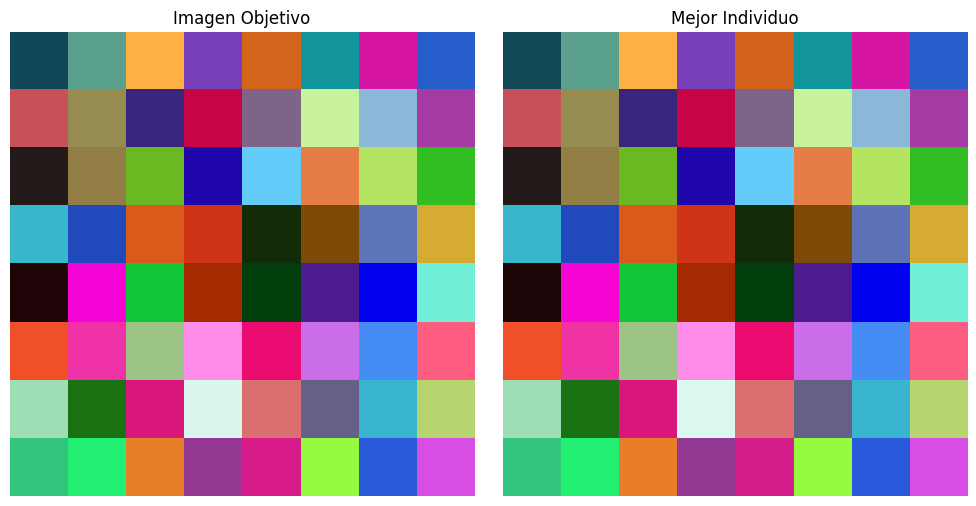

In [17]:
# ---------- Configuración ----------
POP_SIZE = 50
IMG_SHAPE = (8, 8, 3)  # Alto, ancho, canales RGB
MUTATION_RATE = 0.001
MAX_GENERATIONS = 25000  # Puedes reducirlo para pruebas más rápidas

# ---------- Generar imagen objetivo aleatoria ----------
target = np.random.randint(0, 256, IMG_SHAPE, dtype=np.uint8)

# ---------- Funciones de utilidad ----------
def random_individual():
    return np.random.randint(0, 256, IMG_SHAPE, dtype=np.uint8)

def fitness(ind):
    return -np.sum(np.abs(ind.astype(np.int32) - target.astype(np.int32)))

def crossover(p1, p2):
    mask = np.random.rand(*IMG_SHAPE[:2]) < 0.5
    mask = np.stack([mask] * 3, axis=-1)
    return np.where(mask, p1, p2)

def mutate(ind):
    mutation_mask = np.random.rand(*IMG_SHAPE) < MUTATION_RATE
    random_vals = np.random.randint(0, 256, IMG_SHAPE, dtype=np.uint8)
    ind[mutation_mask] = random_vals[mutation_mask]
    return ind

# ---------- Inicializar población ----------
population = [random_individual() for _ in range(POP_SIZE)]

# ---------- Evolución ----------
best_ind = None
best_fit = -np.inf

for gen in range(MAX_GENERATIONS):
    fits = [fitness(ind) for ind in population]
    best_idx = int(np.argmax(fits))
    
    if fits[best_idx] > best_fit:
        best_fit = fits[best_idx]
        best_ind = population[best_idx].copy()

    if gen % 50 == 0:
        print(f"Gen {gen}")

    if best_fit == 0:
        print(f"Imagen objetivo alcanzada en generación {gen}")
        break

    new_pop = []
    for _ in range(POP_SIZE):
        a, b = random.sample(population, 2)
        winner = a if fitness(a) > fitness(b) else b
        new_pop.append(winner)

    children = []
    for i in range(0, POP_SIZE, 2):
        p1 = new_pop[i]
        p2 = new_pop[(i + 1) % POP_SIZE]
        children.append(mutate(crossover(p1, p2)))
        children.append(mutate(crossover(p2, p1)))
    
    population = children[:POP_SIZE]

# ---------- Mostrar resultados ----------
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(target)
axs[0].set_title("Imagen Objetivo")
axs[0].axis('off')

axs[1].imshow(best_ind)
axs[1].set_title("Mejor Individuo")
axs[1].axis('off')

plt.tight_layout()
plt.show()